In [1]:
!python -m sklearnex my_application.py

C:\Users\VINAY\AppData\Local\Programs\Python\Python310\python.exe: No module named sklearnex


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("preprocessed_water.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120110 entries, 0 to 5120109
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   int64  
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  int64  
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Target                  int64  
dtypes: float64(17), int64(4)
memory

In [5]:
import sklearn
# from sklearnex import patch_sklearn
# patch_sklearn()
from sklearn.model_selection import train_test_split as tts


In [6]:
x=df.drop(columns="Target",axis=1)
y=df["Target"]
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.2, stratify=y, random_state=42)

In [7]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096088 entries, 2613649 to 3386366
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   int64  
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  int64  
 18  Water Temperature       float64
 19  Air Temperature         float64
dtypes: float64(17), int64(3)
memory usage: 656.3 MB


In [8]:
ytrain.info()

<class 'pandas.core.series.Series'>
Int64Index: 4096088 entries, 2613649 to 3386366
Series name: Target
Non-Null Count    Dtype
--------------    -----
4096088 non-null  int64
dtypes: int64(1)
memory usage: 62.5 MB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [10]:
lr_clf = LogisticRegression(penalty='l2',solver='liblinear')
lr_clf.fit(xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [11]:
lr_clf.score(xtest,ytest)

0.6969000666001316

In [12]:
import xgboost as xgb

In [13]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(xtrain, ytrain)
accuracy = xgb_clf.score(xtrain, ytrain)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [14]:
xgb_clf.score(xtest,ytest)

0.9999843753356862

In [27]:
from sklearn.metrics import f1_score

ypred=xgb_clf.predict(xtest)
f1 = f1_score(ytest, ypred)

print("F1 Score:", f1)

F1 Score: 0.9999742251433728


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(xtrain,ytrain)
dt_clf.score(xtest,ytest)

0.9990293177295019

In [28]:
ypred=dt_clf.predict(xtest)
f1 = f1_score(ytest, ypred)

print("F1 Score:", f1)

F1 Score: 0.9983991290231143


In [26]:
ytest.value_counts()

0    713641
1    310381
Name: Target, dtype: int64

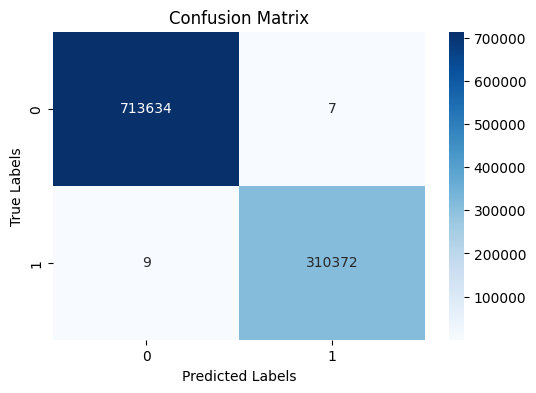

In [34]:
from sklearn.metrics import confusion_matrix

ypred=xgb_clf.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()